In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1F, TH2F
from ROOT import gROOT, gBenchmark, gRandom, gSystem

/home/alex/NuMI/PELEE/
Welcome to JupyROOT 6.24/02


In [2]:
nue_nue_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_trueE_recoCut_07Jul.csv")
nue_nue_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_trueE_recoCut_07Jul.csv")
#nue_nue_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_trueE_recoCut.csv")
#nue_nue_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_trueE_recoCut.csv")

nue_nue_vars_tot = defaultdict(list)
nue_nue_weights_tot = defaultdict(list)


nue_nue_vars_tot = nue_nue_vars_tot_df.to_dict()
nue_nue_weights_tot = nue_nue_weights_tot_df.to_dict()
nue_nue_vars_tot.pop("Unnamed: 0")
nue_nue_weights_tot.pop("Unnamed: 0")

poplist = []

for c in nue_nue_vars_tot.keys():
    if len(nue_nue_weights_tot[c][0]) > 2:
        nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][1:]
        nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][:-1]
        nue_nue_weights_tot[c][0] = list(map(float,nue_nue_weights_tot[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_nue_vars_tot.keys():
    if len(nue_nue_vars_tot[c][0]) > 2:
        nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][1:]
        nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][:-1]
        nue_nue_vars_tot[c][0] = list(map(float,nue_nue_vars_tot[c][0].split(",")))
        
for i in poplist:
    nue_nue_vars_tot.pop(i)
    nue_nue_weights_tot.pop(i)
"""   
###############################################################

nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full.csv")
nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full.csv")

nue_mc_vars_tot = defaultdict(list)
nue_mc_weights_tot = defaultdict(list)


nue_mc_vars_tot = nue_mc_vars_tot_df.to_dict()
nue_mc_weights_tot = nue_mc_weights_tot_df.to_dict()
nue_mc_vars_tot.pop("Unnamed: 0")
nue_mc_weights_tot.pop("Unnamed: 0")

poplist = []

for c in nue_mc_vars_tot.keys():
    if len(nue_mc_weights_tot[c][0]) > 2:
        nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][1:]
        nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][:-1]
        nue_mc_weights_tot[c][0] = list(map(float,nue_mc_weights_tot[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_mc_vars_tot.keys():
    if len(nue_mc_vars_tot[c][0]) > 2:
        nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][1:]
        nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][:-1]
        nue_mc_vars_tot[c][0] = list(map(float,nue_mc_vars_tot[c][0].split(",")))
        
for i in poplist:
    nue_mc_vars_tot.pop(i)
    nue_mc_weights_tot.pop(i)
    
###############################################################

nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full.csv")
nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full.csv")

nue_dirt_vars_tot = defaultdict(list)
nue_dirt_weights_tot = defaultdict(list)


nue_dirt_vars_tot = nue_dirt_vars_tot_df.to_dict()
nue_dirt_weights_tot = nue_dirt_weights_tot_df.to_dict()
nue_dirt_vars_tot.pop("Unnamed: 0")
nue_dirt_weights_tot.pop("Unnamed: 0")

poplist = []

for c in nue_dirt_vars_tot.keys():
    if len(nue_dirt_weights_tot[c][0]) > 2:
        nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][1:]
        nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][:-1]
        nue_dirt_weights_tot[c][0] = list(map(float,nue_dirt_weights_tot[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_dirt_vars_tot.keys():
    if len(nue_dirt_vars_tot[c][0]) > 2:
        nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][1:]
        nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][:-1]
        nue_dirt_vars_tot[c][0] = list(map(float,nue_dirt_vars_tot[c][0].split(",")))
        
for i in poplist:
    nue_dirt_vars_tot.pop(i)
    nue_dirt_weights_tot.pop(i)    
"""  
###############################################################

numu_mc_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_trueE_recoCut_07Jul.csv")
numu_mc_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_trueE_recoCut_07Jul.csv")

numu_mc_vars_tot = defaultdict(list)
numu_mc_weights_tot = defaultdict(list)


numu_mc_vars_tot = numu_mc_vars_tot_df.to_dict()
numu_mc_weights_tot = numu_mc_weights_tot_df.to_dict()
numu_mc_vars_tot.pop("Unnamed: 0")
numu_mc_weights_tot.pop("Unnamed: 0")

poplist = []

for c in numu_mc_vars_tot.keys():
    if len(numu_mc_weights_tot[c][0]) > 2:
        numu_mc_weights_tot[c][0] = numu_mc_weights_tot[c][0][1:]
        numu_mc_weights_tot[c][0] = numu_mc_weights_tot[c][0][:-1]
        numu_mc_weights_tot[c][0] = list(map(float,numu_mc_weights_tot[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in numu_mc_vars_tot.keys():
    if len(numu_mc_vars_tot[c][0]) > 2:
        numu_mc_vars_tot[c][0] = numu_mc_vars_tot[c][0][1:]
        numu_mc_vars_tot[c][0] = numu_mc_vars_tot[c][0][:-1]
        numu_mc_vars_tot[c][0] = list(map(float,numu_mc_vars_tot[c][0].split(",")))
        
for i in poplist:
    numu_mc_vars_tot.pop(i)
    numu_mc_weights_tot.pop(i)
    
###############################################################
"""
numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot.csv")
numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot.csv")

numu_dirt_vars_tot = defaultdict(list)
numu_dirt_weights_tot = defaultdict(list)


numu_dirt_vars_tot = numu_dirt_vars_tot_df.to_dict()
numu_dirt_weights_tot = numu_dirt_weights_tot_df.to_dict()
numu_dirt_vars_tot.pop("Unnamed: 0")
numu_dirt_weights_tot.pop("Unnamed: 0")

poplist = []

for c in numu_dirt_vars_tot.keys():
    if len(numu_dirt_weights_tot[c][0]) > 2:
        numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][1:]
        numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][:-1]
        numu_dirt_weights_tot[c][0] = list(map(float,numu_dirt_weights_tot[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in numu_dirt_vars_tot.keys():
    if len(numu_dirt_vars_tot[c][0]) > 2:
        numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][1:]
        numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][:-1]
        numu_dirt_vars_tot[c][0] = list(map(float,numu_dirt_vars_tot[c][0].split(",")))
        
for i in poplist:
    numu_dirt_vars_tot.pop(i)
    numu_dirt_weights_tot.pop(i) 
"""

'\nnumu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot.csv")\nnumu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot.csv")\n\nnumu_dirt_vars_tot = defaultdict(list)\nnumu_dirt_weights_tot = defaultdict(list)\n\n\nnumu_dirt_vars_tot = numu_dirt_vars_tot_df.to_dict()\nnumu_dirt_weights_tot = numu_dirt_weights_tot_df.to_dict()\nnumu_dirt_vars_tot.pop("Unnamed: 0")\nnumu_dirt_weights_tot.pop("Unnamed: 0")\n\npoplist = []\n\nfor c in numu_dirt_vars_tot.keys():\n    if len(numu_dirt_weights_tot[c][0]) > 2:\n        numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][1:]\n        numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][:-1]\n        numu_dirt_weights_tot[c][0] = list(map(float,numu_dirt_weights_tot[c][0].split(",")))\n    else:\n        poplist.append(c)\n        \nfor c in numu_dirt_vars_tot.keys():\n    if len(numu_dirt_vars_tot[c][0]) > 2:\n        numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][1:]\n        numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot

In [3]:
import csv

with open('nue_nue_stat_errs_full_catsel_nopions_trueE.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_stat_errs = list(csv_reader)

for a in range(len(nue_nue_stat_errs)):
    nue_nue_stat_errs[a] = float(nue_nue_stat_errs[a][0])
    
print("nue_nue_stat_errs = ", nue_nue_stat_errs)

with open('nue_nue_stat_errs_selected_full_catsel_nopions_trueE.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_stat_errs_selected = list(csv_reader)

for a in range(len(nue_nue_stat_errs_selected)):
    nue_nue_stat_errs_selected[a] = float(nue_nue_stat_errs_selected[a][0])
    
print("nue_nue_stat_errs_selected = ", nue_nue_stat_errs_selected)
print("")

################################################

with open('nue_mc_stat_errs_full.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_stat_errs = list(csv_reader)

for a in range(len(nue_mc_stat_errs)):
    nue_mc_stat_errs[a] = float(nue_mc_stat_errs[a][0])
    
print("nue_mc_stat_errs = ", nue_mc_stat_errs)

with open('nue_mc_stat_errs_selected_full.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_stat_errs_selected = list(csv_reader)

for a in range(len(nue_mc_stat_errs_selected)):
    nue_mc_stat_errs_selected[a] = float(nue_mc_stat_errs_selected[a][0])
    
print("nue_mc_stat_errs_selected = ", nue_mc_stat_errs_selected)

print("")

###################################################

with open('nue_dirt_stat_errs_full.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_dirt_stat_errs = list(csv_reader)

for a in range(len(nue_dirt_stat_errs)):
    nue_dirt_stat_errs[a] = float(nue_dirt_stat_errs[a][0])
    
print("nue_dirt_stat_errs = ", nue_dirt_stat_errs)

with open('nue_dirt_stat_errs_selected_full.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_dirt_stat_errs_selected = list(csv_reader)

for a in range(len(nue_dirt_stat_errs_selected)):
    nue_dirt_stat_errs_selected[a] = float(nue_dirt_stat_errs_selected[a][0])
    
print("nue_dirt_stat_errs_selected = ", nue_dirt_stat_errs_selected)

print("")

################################################

with open('numu_mc_stat_errs_full_catsel_nopions_trueE.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_stat_errs = list(csv_reader)

for a in range(len(numu_mc_stat_errs)):
    numu_mc_stat_errs[a] = float(numu_mc_stat_errs[a][0])
    
print("numu_mc_stat_errs = ", numu_mc_stat_errs)

with open('numu_mc_stat_errs_selected_full_catsel_nopions_trueE.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_stat_errs_selected = list(csv_reader)

for a in range(len(numu_mc_stat_errs_selected)):
    numu_mc_stat_errs_selected[a] = float(numu_mc_stat_errs_selected[a][0])
    
print("numu_mc_stat_errs_selected = ", numu_mc_stat_errs_selected)

print("")

###################################################

with open('numu_dirt_stat_errs.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_dirt_stat_errs = list(csv_reader)

for a in range(len(numu_dirt_stat_errs)):
    numu_dirt_stat_errs[a] = float(numu_dirt_stat_errs[a][0])
    
print("numu_dirt_stat_errs = ", numu_dirt_stat_errs)

with open('numu_dirt_stat_errs_selected.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_dirt_stat_errs_selected = list(csv_reader)

for a in range(len(numu_dirt_stat_errs_selected)):
    numu_dirt_stat_errs_selected[a] = float(numu_dirt_stat_errs_selected[a][0])
    
print("numu_dirt_stat_errs_selected = ", numu_dirt_stat_errs_selected)

nue_nue_stat_errs =  [0.2173001685575204, 1.1368482947931193, 0.8546338552509574, 0.34465376555462235, 0.14163756512226275, 0.06703565238936848, 0.039033417846974054, 0.019516708923487027, 0.009829067175234409, 0.004172050095962807]
nue_nue_stat_errs_selected =  [30.08480989933014, 151.62864589691162, 111.03930854797363, 43.9004852771759, 16.854843378067017, 8.271492063999176, 4.829256534576416, 2.5025043934583664, 1.2736533805727959, 0.5006552059203386]



FileNotFoundError: [Errno 2] No such file or directory: 'nue_mc_stat_errs_full.csv'

In [ ]:
def get_cov_matrix(final_ns, final_ncvs, Nuniverse):
  
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
        
    cov = np.empty([len(final_ns[0]), len(final_ns[0])])
    cov.fill(0)

    for n in final_ns:
        for i in range(len(final_ns[0])):
            for j in range(len(final_ns[0])):
                cov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])
    
    cov /= Nuniverse
    
    return cov


def get_geo_cov_matrix(final_ns, final_ncvs):
    
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
    
    for x in range(len(final_ns)):
        final_ns[x] = np.array_split(final_ns[x], 2)
    
    variationNumber=0

    for n_tot_pair in final_ns:
        tempCov = np.empty([len(final_ns), len(final_ns)])
        tempCov.fill(0)
        for n in n_tot_pair:
            for i in range(len(final_ns)):
                for j in range(len(final_ns)):
                    tempCov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])

        tempCov /= 2

        if variationNumber == 0:
            cov = tempCov
            variationNumber = variationNumber+1
        else:
            cov += tempCov
            variationNumber = variationNumber+1
    
    return cov

In [4]:
import csv
import numpy as np

#############################
#### nue_nue ################
#############################
with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_trueE.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ns_ppfx = list(csv_reader)   
    
with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_trueE.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ncvs_ppfx = list(csv_reader)


with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_trueE.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ns_genie = list(csv_reader)
    
with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_trueE.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ncvs_genie = list(csv_reader)

    
with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_trueE.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ns_reint = list(csv_reader)
    #print(nue_nue_final_ns_reint)
    
with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_trueE.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ncvs_reint = list(csv_reader)  
    #print(nue_nue_final_ncvs_reint)
    
    
with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_trueE.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ns_geo = list(csv_reader)
    
with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_trueE.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ncvs_geo = list(csv_reader)    

    
    
cov_nue_nue_ppfx = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
cov_nue_nue_genie = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
cov_nue_nue_reint = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
cov_nue_nue_geo = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

###########################################################################################

#############################
#### numu_mc ################
#############################
with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_trueE.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ns_ppfx = list(csv_reader)   
    
with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_trueE.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ncvs_ppfx = list(csv_reader)


with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_trueE.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ns_genie = list(csv_reader)
    
with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_trueE.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ncvs_genie = list(csv_reader)

    
with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_trueE.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ns_reint = list(csv_reader)
    
with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_trueE.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ncvs_reint = list(csv_reader)   
    
    
with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_trueE.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ns_geo = list(csv_reader)
    
with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_trueE.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ncvs_geo = list(csv_reader)    

    
    
cov_numu_mc_ppfx = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
cov_numu_mc_genie = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
cov_numu_mc_reint = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
cov_numu_mc_geo = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)

NameError: name 'get_cov_matrix' is not defined

In [5]:
############
### ppfx ###
############

#################################################

nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_trueE.csv")

nue_nue_df_ppfx = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_ppfx)


nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_trueE.csv")

nue_nue_df_ppfx_vars = nue_nue_df_ppfx_vars.set_index('entry')
#print(nue_nue_df_ppfx_vars)   


nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_trueE.csv")

nue_nue_df_ppfx_splines = nue_nue_df_ppfx_splines.set_index('entry')
#print(nue_nue_df_ppfx_splines)

#################################################

numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_trueE.csv")

numu_mc_df_ppfx = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_ppfx)


numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_trueE.csv")

numu_mc_df_ppfx_vars = numu_mc_df_ppfx_vars.set_index('entry')
#print(nue_nue_df_ppfx_vars)   


numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_trueE.csv")

numu_mc_df_ppfx_splines = numu_mc_df_ppfx_splines.set_index('entry')
#print(nue_nue_df_ppfx_splines)


############
### genie ###
############

#################################################

nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_trueE.csv")

nue_nue_df_genie = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_trueE.csv")

nue_nue_df_genie_vars = nue_nue_df_genie_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_trueE.csv")

nue_nue_df_genie_splines = nue_nue_df_genie_splines.set_index('entry')
#print(nue_nue_df_genie_splines)

#################################################

numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_trueE.csv")

numu_mc_df_genie = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_ppfx)


numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_trueE.csv")

numu_mc_df_genie_vars = numu_mc_df_genie_vars.set_index('entry')
#print(nue_nue_df_ppfx_vars)   


numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_trueE.csv")

numu_mc_df_genie_splines = numu_mc_df_genie_splines.set_index('entry')
#print(nue_nue_df_ppfx_splines)


############
### reint ###
############

#################################################

nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_trueE.csv")

nue_nue_df_reint = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_trueE.csv")

nue_nue_df_reint_vars = nue_nue_df_reint_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_trueE.csv")

nue_nue_df_reint_splines = nue_nue_df_reint_splines.set_index('entry')
#print(nue_nue_df_genie_splines)

#################################################

numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_trueE.csv")

numu_mc_df_reint = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_ppfx)


numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_trueE.csv")

numu_mc_df_reint_vars = numu_mc_df_reint_vars.set_index('entry')
#print(nue_nue_df_ppfx_vars)   


numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_trueE.csv")

numu_mc_df_reint_splines = numu_mc_df_reint_splines.set_index('entry')
#print(nue_nue_df_ppfx_splines)


############
### geo ###
############

#################################################

nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_trueE.csv")

nue_nue_df_geo = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_trueE.csv")

nue_nue_df_geo_vars = nue_nue_df_geo_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_trueE.csv")

nue_nue_df_geo_splines = nue_nue_df_geo_splines.set_index('entry')
#print(nue_nue_df_genie_splines)

#################################################

numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_trueE.csv")

numu_mc_df_geo = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_ppfx)


numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_trueE.csv")

numu_mc_df_geo_vars = numu_mc_df_geo_vars.set_index('entry')
#print(nue_nue_df_ppfx_vars)   


numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_trueE.csv")

numu_mc_df_geo_splines = numu_mc_df_geo_splines.set_index('entry')
#print(nue_nue_df_ppfx_splines)

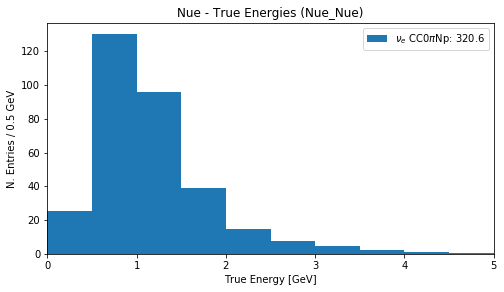

In [6]:
category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    #2: r"$\nu_{\mu}$ CC",
    2: r"$\nu_e$ CC0$\pi$Np",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}

    
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(nue_nue_weights_tot[str(c)][0])) \
            if sum(nue_nue_weights_tot[str(c)][0]) else ""
            for c in nue_nue_vars_tot.keys()
        ]


pup = list(nue_nue_vars_tot.values())

i = 0
for c in nue_nue_vars_tot.keys():
    nue_nue_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_weights_tot.values())

i = 0
for c in nue_nue_weights_tot.keys():
    nue_nue_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
        


nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 5])

VARIABLE, BINS, RANGE, XTIT = 'nu_e',10,(0.0, 5.0),"True Energy [GeV]"

nue_stacked = nue_ax1.hist(
            nue_nue_vars_tot.values(),
            weights=list(nue_nue_weights_tot.values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

n_nue_tot = nue_stacked[0]

plt.title("Nue - True Energies (Nue_Nue)")
plt.xlabel("True Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [6]:
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(nue_mc_weights_tot[str(c)][0])) \
            if sum(nue_mc_weights_tot[str(c)][0]) else ""
            for c in nue_mc_vars_tot.keys()
        ]


pup = list(nue_mc_vars_tot.values())

i = 0
for c in nue_mc_vars_tot.keys():
    nue_mc_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_mc_weights_tot.values())

i = 0
for c in nue_mc_weights_tot.keys():
    nue_mc_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
        
nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 5])
nue_ax1.set_ylim([0, 200])

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"

nue_stacked = nue_ax1.hist(
            nue_mc_vars_tot.values(),
            weights=list(nue_mc_weights_tot.values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

plt.title("adding test - mc")
plt.legend()

NameError: name 'nue_mc_vars_tot' is not defined

No handles with labels found to put in legend.


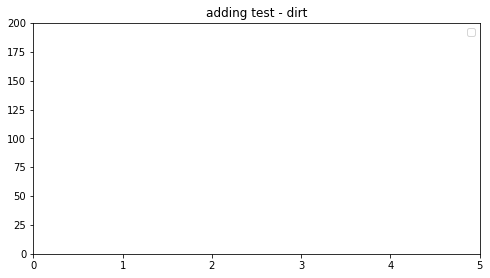

In [9]:
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(nue_dirt_weights_tot[str(c)][0])) \
            if sum(nue_dirt_weights_tot[str(c)][0]) else ""
            for c in nue_dirt_vars_tot.keys()
        ]


pup = list(nue_dirt_vars_tot.values())

i = 0
for c in nue_dirt_vars_tot.keys():
    nue_dirt_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_dirt_weights_tot.values())

i = 0
for c in nue_dirt_weights_tot.keys():
    nue_dirt_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
        
nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 5])
nue_ax1.set_ylim([0, 200])

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"

nue_stacked = nue_ax1.hist(
            nue_dirt_vars_tot.values(),
            weights=list(nue_dirt_weights_tot.values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

plt.title("adding test - dirt")
plt.legend()

In [10]:
def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
total_nue_vars_part1 = mergeDictionary(nue_nue_vars_tot, nue_mc_vars_tot)
total_nue_weights_part1 = mergeDictionary(nue_nue_weights_tot, nue_mc_weights_tot)

total_nue_vars = mergeDictionary(total_nue_vars_part1, nue_dirt_vars_tot)
total_nue_weights = mergeDictionary(total_nue_weights_part1, nue_dirt_weights_tot)

In [7]:

labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(total_nue_weights[str(c)])) \
            if sum(total_nue_weights[str(c)]) else ""
            for c in total_nue_vars.keys()
        ]


pup = list(total_nue_vars.values())

i = 0
for c in total_nue_vars.keys():
    total_nue_vars[str(c)] = pup[i]
    i = i + 1
    
pup2 = list(total_nue_weights.values())

i = 0
for c in total_nue_weights.keys():
    total_nue_weights[str(c)] = pup2[i]
    i = i + 1
        
nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 5])

VARIABLE, BINS, RANGE, XTIT = 'nu_e',10,(0.0, 5.0),"True Energy [GeV]"

nue_stacked = nue_ax1.hist(
            total_nue_vars.values(),
            weights=list(total_nue_weights.values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

#CATSEL
print(nue_stacked[0])
n_nue_tot = nue_stacked[0]
#print("Rounding to 3dp")
#n_nue_tot = np.round(n_nue_tot, 3)
#print(n_nue_tot)



plt.title("Nue - True Energies")
plt.xlabel("True Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

NameError: name 'total_nue_vars' is not defined

In [7]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

#wanted_key = 5

#nue_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked)

nue_wanted_list = n_nue_tot

Sidenote for unfolding 

In [13]:
#Data_signal - UNFOLDING INPUT
prior_true_signal = nue_wanted_list

print(prior_true_signal)
print(sum(prior_true_signal))

[ 25.54917281 130.21068376  95.89263236  38.90477975  14.75874474
   7.29417811   4.35415659   2.19412388   1.04933144   0.39249798]
320.60030142353946


826

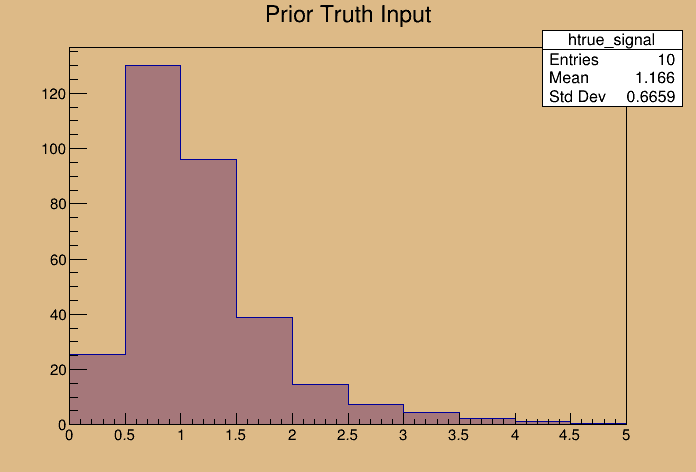

In [14]:
#histFile = ROOT.TFile.Open( "htrue_signal_nue_energy.root" ,"READ ")

# Create a new canvas, and customize it.
c1 = TCanvas( 'c1', 'Dynamic Filling Example', 200, 10, 700, 500 )
c1.SetFillColor( 42 )
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderSize( 6 )
c1.GetFrame().SetBorderMode( -1 )

hfile = gROOT.FindObject( 'WSD_nue_energy_Flip.root' )
if hfile:
    hfile.Close()
hfile = TFile( 'WSD_nue_energy_Flip.root', 'RECREATE', 'Demo ROOT file with histograms' )

# Create some histograms, a profile histogram and an ntuple
hpx    = TH1F( 'htrue_signal', 'Prior Truth Input', 10, 0, 5 )

# Set canvas/frame attributes.
hpx.SetFillColor( 48 )
gBenchmark.Start( 'hsimple' )
#gStyle.SetErrorX(0.0001)


for a in range(len(prior_true_signal)):
    hpx.Fill(a/2 + 0.25, prior_true_signal[a])

hpx.Draw("hist")
hpx.SetFillColor( 0 )
c1.Modified()
c1.Update() 
hpx.SetFillColor( 48 )
c1.Modified()
c1.Update()
c1.Draw()
hfile.Write()

In [14]:
np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_07Jul.csv", 
           prior_true_signal,
           delimiter =", ", 
           fmt ='% s')

## Now do Numu

In [10]:
category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    #2: r"$\nu_{\mu}$ CC",
    2: r"$\nu_e$ CC0$\pi$Np",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}

    
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(numu_mc_weights_tot[str(c)][0])) \
            if sum(numu_mc_weights_tot[str(c)][0]) else ""
            for c in numu_mc_vars_tot.keys()
        ]


pup = list(numu_mc_vars_tot.values())

i = 0
for c in numu_mc_vars_tot.keys():
    numu_mc_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_weights_tot.values())

i = 0
for c in numu_mc_weights_tot.keys():
    numu_mc_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
        


numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([0, 5])
#numu_ax1.set_ylim([0, 14000])

VARIABLE, BINS, RANGE, XTIT = 'nu_e',10,(0.0, 5.0),"True Energy [GeV]"

numu_stacked = numu_ax1.hist(
            numu_mc_vars_tot.values(),
            weights=list(numu_mc_weights_tot.values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

n_numu_tot = numu_stacked[0]

plt.title("adding test")
plt.legend()

TypeError: 'float' object is not iterable

In [11]:
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(numu_dirt_weights_tot[str(c)][0])) \
            if sum(numu_dirt_weights_tot[str(c)][0]) else ""
            for c in numu_dirt_vars_tot.keys()
        ]


pup = list(numu_dirt_vars_tot.values())

i = 0
for c in numu_dirt_vars_tot.keys():
    numu_dirt_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_dirt_weights_tot.values())

i = 0
for c in numu_dirt_weights_tot.keys():
    numu_dirt_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
        
numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([0, 5])
numu_ax1.set_ylim([0, 550])

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"

numu_stacked = numu_ax1.hist(
            numu_dirt_vars_tot.values(),
            weights=list(numu_dirt_weights_tot.values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

plt.title("adding test - dirt")
plt.legend()

NameError: name 'numu_dirt_vars_tot' is not defined

In [12]:
def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict

total_numu_vars = mergeDictionary(numu_mc_vars_tot, numu_dirt_vars_tot)
total_numu_weights = mergeDictionary(numu_mc_weights_tot, numu_dirt_weights_tot)

NameError: name 'numu_dirt_vars_tot' is not defined

In [13]:
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(total_numu_weights[str(c)])) \
            if sum(total_numu_weights[str(c)]) else ""
            for c in total_numu_vars.keys()
        ]


pup = list(total_numu_vars.values())

i = 0
for c in total_numu_vars.keys():
    total_numu_vars[str(c)] = pup[i]
    i = i + 1
    
pup2 = list(total_numu_weights.values())

i = 0
for c in total_numu_weights.keys():
    total_numu_weights[str(c)] = pup2[i]
    i = i + 1
        
numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([0, 5])
#numu_ax1.set_ylim([0, 14000])

VARIABLE, BINS, RANGE, XTIT = 'nu_e',10,(0.0, 5.0),"True Energy [GeV]"

numu_stacked = numu_ax1.hist(
            total_numu_vars.values(),
            weights=list(total_numu_weights.values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

#CATSEL
print(numu_stacked[0])
n_numu_tot = numu_stacked[0]

plt.title("Numu - True Energies")
plt.xlabel("True Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

NameError: name 'total_numu_vars' is not defined

In [14]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)


#wanted_key = 4

#numu_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, numu_stacked)

numu_wanted_list = n_numu_tot

Sidenote for unfolding 

In [15]:
#Data_signal - UNFOLDING INPUT
prior_true_signal = numu_wanted_list

print(prior_true_signal)

[1011.16888403 2086.34697773 1662.74372383 1079.4921212   449.42161264
  181.00842877  108.45917309   64.00839843   38.66954193   23.13261749]


In [18]:
np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_07Jul.csv", 
           prior_true_signal,
           delimiter =", ", 
           fmt ='% s')

## Ratio Plot


bin_ratios:
[0.029169066795481143, 0.07103473783200236, 0.06443917441740074, 0.039121772595598805, 0.03594700893941636, 0.04366708445725528, 0.04229136256631084, 0.03702085708838665, 0.031166152958826444, 0.020656109680580185]


Making ratio plot.
count,  [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
bins,  [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
Weights,  [0.029169066795481143, 0.07103473783200236, 0.06443917441740074, 0.039121772595598805, 0.03594700893941636, 0.04366708445725528, 0.04229136256631084, 0.03702085708838665, 0.031166152958826444, 0.020656109680580185]



Text(0.5, 1.0, 'Ratio')

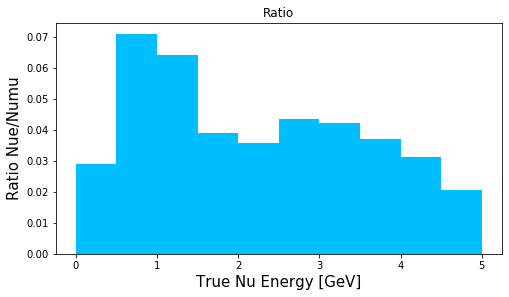

In [18]:
ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])

rbin_ratios = []

nue_ratio_nums = nue_wanted_list
numu_ratio_nums = numu_wanted_list

for i in range(len(numu_ratio_nums)):
    if nue_ratio_nums[i] > 0 and numu_ratio_nums[i] > 0:
        rratio = nue_ratio_nums[i]/numu_ratio_nums[i]
        rbin_ratios.append(rratio)
    else:
        rbin_ratios.append(0)

print("")
print("bin_ratios:")
print(rbin_ratios)
print("")

bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
weights = []
for i in range(len(count)):
    weight = count[i]*rbin_ratios[i]
    weights.append(weight)

print("")
print("Making ratio plot.")
print("count, ", count)
print("bins, ", bins)
print("Weights, ", rbin_ratios)
print("")

sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=rbin_ratios)
ratio_ax1.set_ylabel('Ratio Nue/Numu', fontsize=15)
ratio_ax1.set_xlabel('True Nu Energy [GeV]', fontsize=15)
ratio_ax1.set_title("Ratio")

## Errors

### Get ratio stat errs

In [19]:
nue_mc_stat_errs = np.array(nue_mc_stat_errs)
nue_nue_stat_errs = np.array(nue_nue_stat_errs)
nue_dirt_stat_errs = np.array(nue_dirt_stat_errs)

numu_mc_stat_errs = np.array(numu_mc_stat_errs)
numu_dirt_stat_errs = np.array(numu_dirt_stat_errs)

### Expected Error Calculations

In [20]:
nue_exp_err    = np.sqrt(nue_mc_stat_errs + nue_nue_stat_errs + nue_dirt_stat_errs)
totalstat_nue = nue_mc_stat_errs + nue_nue_stat_errs + nue_dirt_stat_errs
print("totalstat_nue ",totalstat_nue )
print("nue_exp_err ", nue_exp_err)
print("")

numu_exp_err    = np.sqrt(numu_mc_stat_errs + nue_mc_stat_errs + numu_dirt_stat_errs)
totalstat_numu = numu_mc_stat_errs + nue_mc_stat_errs + numu_dirt_stat_errs
print("totalstat_numu ",totalstat_numu )
print("numu_exp_err ", numu_exp_err)


totalstat_nue  [0.21730017 1.13684829 0.85463386 0.34465377 0.14163757 0.06703565
 0.03903342 0.01951671 0.00982907 0.00417205]
nue_exp_err  [0.46615466 1.06623088 0.92446409 0.5870722  0.37634767 0.25891244
 0.19756877 0.13970222 0.09914165 0.06459141]

totalstat_numu  [ 81.51922483 162.90656524 134.229031    90.20161575  39.10373026
  15.71622661   9.40042832   5.45854957   3.18720679   1.91965099]
numu_exp_err  [ 9.02879974 12.76348562 11.58572531  9.49745312  6.25329755  3.96436964
  3.06601179  2.3363539   1.78527499  1.3855147 ]


In [21]:
###########################################################
#Making cov matricies - the real errors
###########################################################

nue_cov           = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_stat   = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_detsys = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_data_stat = np.zeros([len(nue_exp_err), len(nue_exp_err)])

numu_cov           = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_stat   = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_detsys = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_data_stat = np.zeros([len(numu_exp_err), len(numu_exp_err)])

ratio_cov           = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_mc_stat   = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_mc_detsys = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_data_stat = np.zeros([len(numu_exp_err), len(numu_exp_err)])

print(ratio_cov)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [22]:
nue_cov_mc_stat[np.diag_indices_from(nue_cov_mc_stat)]     = (nue_mc_stat_errs + nue_nue_stat_errs + nue_dirt_stat_errs)
#nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
print("nue_cov_mc_stat = ", np.diag(nue_cov_mc_stat))

numu_cov_mc_stat[np.diag_indices_from(numu_cov_mc_stat)]     = (numu_mc_stat_errs + nue_mc_stat_errs + numu_dirt_stat_errs)
#nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
print("numu_cov_mc_stat = ", np.diag(numu_cov_mc_stat))


#Now find the ratio error by combining the variances
squared_ratio_numbers = [number ** 2 for number in rbin_ratios]
dnue = np.diag(nue_cov_mc_stat)/(n_nue_tot**2)
dnumu = np.diag(numu_cov_mc_stat)/(n_numu_tot**2)
rratio_stat_errs = squared_ratio_numbers*((dnue) + (dnumu))


ratio_cov_mc_stat[np.diag_indices_from(ratio_cov_mc_stat)]     = rratio_stat_errs
print("ratio_cov_mc_stat = ", np.diag(ratio_cov_mc_stat))

nue_cov_mc_stat =  [0.21730017 1.13684829 0.85463386 0.34465377 0.14163757 0.06703565
 0.03903342 0.01951671 0.00982907 0.00417205]
numu_cov_mc_stat =  [ 81.51922483 162.90656524 134.229031    90.20161575  39.10373026
  15.71622661   9.40042832   5.45854957   3.18720679   1.91965099]
ratio_cov_mc_stat =  [2.69474013e-07 4.29915693e-07 4.75535967e-07 3.83339281e-07
 8.74086956e-07 2.70351236e-06 4.28291853e-06 5.90844271e-06
 7.73910697e-06 8.49605417e-06]


### Now need the systematic errors

In [23]:
nue_cov = (cov_nue_nue_ppfx + cov_nue_nue_genie + cov_nue_nue_reint)
nue_cov += (cov_nue_nue_geo)


numu_cov = (cov_numu_mc_ppfx + cov_numu_mc_genie + cov_numu_mc_reint)
numu_cov += (cov_numu_mc_geo)

In [24]:
nue_exp_err = np.sqrt( np.diag((nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys)))

numu_exp_err = np.sqrt( np.diag((numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys)))

print("")
print("nue_exp_err ", nue_exp_err)
print("")
nue_frac_err = nue_exp_err / n_nue_tot
print("nue_frac_err ",nue_frac_err)
print("")
print("numu_exp_err ", numu_exp_err)
numu_frac_err = numu_exp_err / n_numu_tot
print("")
print("numu_frac_err ", numu_frac_err)


nue_exp_err  [ 6.78017497 31.86633021 25.0388996  10.04572293  3.59939136  2.20154545
  1.70624086  1.06888363  0.6334734   0.25168594]

nue_frac_err  [0.22536871 0.21016034 0.2254958  0.22882942 0.21355233 0.2661606
 0.35331334 0.42712555 0.49736717 0.50271309]

numu_exp_err  [190.21553536 447.35444865 381.02382043 249.37749969 100.81757716
  43.4396941   27.27602912  17.03770949  12.03311502   7.57818038]

numu_frac_err  [0.18442561 0.20957586 0.22111862 0.22223192 0.21501773 0.22932799
 0.238865   0.25204774 0.29444894 0.31266171]


### Ratio Sys Errors

In [25]:
#####CORRECT way of doing ratio errors##########
##################
#### ppfx ##########
##################


####First get the central value to compare against. We have already got this above. 
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list

rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins = 10
x_range = (0.0, 5.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

##Nue
s_n = nue_nue_df_ppfx
df_n = pd.DataFrame(s_n.values.tolist())

variable_nue = nue_nue_df_ppfx_vars.squeeze()
spline_fix_var_nue = pd.DataFrame(nue_nue_df_ppfx_splines)
spline_fix_var_nue = spline_fix_var_nue.squeeze()

##Numu
s_m = numu_mc_df_ppfx
df_m = pd.DataFrame(s_m.values.tolist())

variable_numu = numu_mc_df_ppfx_vars.squeeze()
spline_fix_var_numu = pd.DataFrame(numu_mc_df_ppfx_splines)
spline_fix_var_numu = spline_fix_var_numu.squeeze()

n_test, bins = np.histogram(
            variable_nue, weights=spline_fix_var_nue, range=x_range, bins=n_bins)

##Ratio
if (not df_n.empty) and (not df_m.empty):
    for i in range(Nuniverse):
        weight_n = df_n[i].values / 1000.
        weight_n[np.isnan(weight_n)] = 1
        weight_n[weight_n > 100] = 1
        weight_n[weight_n < 0] = 1
        weight_n[weight_n == np.inf] = 1
        weight_m = df_m[i].values / 1000.
        weight_m[np.isnan(weight_m)] = 1
        weight_m[weight_m > 100] = 1
        weight_m[weight_m < 0] = 1
        weight_m[weight_m == np.inf] = 1
        n_n, bins = np.histogram(
            variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
        n_m, bins = np.histogram(
            variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)
        rbin_ratios_sys = []

        for g in range(len(n_n)):
            if n_n[g] > 0 and n_m[g] > 0:
                rratio = n_n[g]/n_m[g]
                rbin_ratios_sys.append(rratio)
            else:
                rbin_ratios_sys.append(0)
                        
        n_tot[i] += rbin_ratios_sys 
        
##Cov matrix

cov_ratio_ppfx = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_ppfx.fill(0)

n_cv_tot = rbin_cv_ratios

a = -1
for n in n_tot:
    a = a + 1
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_ppfx[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

                
cov_ratio_ppfx /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_ppfx)
print("--------------------------------------------------")
print("")



cov of ratio sys error =  [[ 4.14755732e-06  4.94493776e-06  1.67680744e-06 -7.62577334e-08
  -9.74344997e-07  2.58471873e-07 -6.67826741e-07  2.36133893e-06
   6.90371501e-08 -1.95817739e-06]
 [ 4.94493776e-06  1.27435192e-05  4.16077498e-06  8.56663041e-07
   8.58842507e-07 -3.77803830e-07  6.77368367e-07  7.82980648e-07
  -8.98719008e-07  5.95398675e-07]
 [ 1.67680744e-06  4.16077498e-06  3.10601469e-06  1.16094515e-06
   7.54988335e-07  1.62052421e-06  1.99041479e-06  2.47567996e-07
   1.39394188e-06  9.88456551e-07]
 [-7.62577334e-08  8.56663041e-07  1.16094515e-06  1.21549698e-06
   7.64068228e-07  9.22268105e-07  9.25772612e-07 -1.04063802e-07
   8.70184055e-07  1.32040398e-06]
 [-9.74344997e-07  8.58842507e-07  7.54988335e-07  7.64068228e-07
   1.73793210e-06  7.47872721e-07  1.80992982e-06 -5.24618030e-07
  -2.95648720e-07  1.85704658e-06]
 [ 2.58471873e-07 -3.77803830e-07  1.62052421e-06  9.22268105e-07
   7.47872721e-07  4.83770875e-06  2.73677789e-06  5.77247595e-07
   2.4

In [26]:
#####CORRECT way of doing ratio errors##########
##################
#### genie ##########
##################


####First get the central value to compare against. We have already got this above. 
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins = 10
x_range = (0.0, 5.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

##Nue
s_n = nue_nue_df_genie
df_n = pd.DataFrame(s_n.values.tolist())

variable_nue = nue_nue_df_genie_vars.squeeze()
spline_fix_var_nue = pd.DataFrame(nue_nue_df_genie_splines)
spline_fix_var_nue = spline_fix_var_nue.squeeze()

##Numu
s_m = numu_mc_df_genie
df_m = pd.DataFrame(s_m.values.tolist())

variable_numu = numu_mc_df_genie_vars.squeeze()
spline_fix_var_numu = pd.DataFrame(numu_mc_df_genie_splines)
spline_fix_var_numu = spline_fix_var_numu.squeeze()


##Ratio
if (not df_n.empty) and (not df_m.empty):
    for i in range(Nuniverse):
        weight_n = df_n[i].values / 1000.
        weight_n[np.isnan(weight_n)] = 1
        weight_n[weight_n > 100] = 1
        weight_n[weight_n < 0] = 1
        weight_n[weight_n == np.inf] = 1
        weight_m = df_m[i].values / 1000.
        weight_m[np.isnan(weight_m)] = 1
        weight_m[weight_m > 100] = 1
        weight_m[weight_m < 0] = 1
        weight_m[weight_m == np.inf] = 1
        n_n, bins = np.histogram(
            variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
        n_m, bins = np.histogram(
            variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)

        rbin_ratios_sys = []

        for g in range(len(n_n)):
            if n_n[g] > 0 and n_m[g] > 0:
                rratio = n_n[g]/n_m[g]
                rbin_ratios_sys.append(rratio)
            else:
                rbin_ratios_sys.append(0)
                        
        n_tot[i] += rbin_ratios_sys 
        
##Cov matrix

cov_ratio_genie = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_genie.fill(0)

n_cv_tot = rbin_cv_ratios

for n in n_tot:
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_genie[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

cov_ratio_genie /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_genie)
print("--------------------------------------------------")
print("")


cov of ratio sys error =  [[ 7.91720366e-06  3.10172087e-06 -9.96754366e-07 -4.46760620e-07
  -1.35874457e-06 -2.01373770e-06 -3.44584964e-06  6.35783464e-07
   1.08833448e-06 -2.89809658e-06]
 [ 3.10172087e-06  1.47107968e-06 -3.27994380e-07 -2.69246322e-07
  -3.89205838e-07 -7.13214211e-07 -1.31519160e-06  3.88862590e-07
   7.54340414e-07 -1.01555770e-06]
 [-9.96754366e-07 -3.27994380e-07  1.84235564e-07  2.08057082e-08
   2.02737560e-07  2.54984751e-07  4.06850907e-07 -6.03668225e-08
   6.14904788e-08  3.01107376e-07]
 [-4.46760620e-07 -2.69246322e-07  2.08057082e-08  1.44276590e-07
   2.78147305e-08  4.39761212e-08  1.76701331e-07 -8.88317790e-08
  -3.34942660e-07  2.60145189e-07]
 [-1.35874457e-06 -3.89205838e-07  2.02737560e-07  2.78147305e-08
   4.04494481e-07  3.52933390e-07  5.58945099e-07  2.46001575e-09
   4.04535360e-08  6.03210547e-07]
 [-2.01373770e-06 -7.13214211e-07  2.54984751e-07  4.39761212e-08
   3.52933390e-07  7.54456826e-07  1.06049269e-06 -1.20943772e-07
  -1.6

In [27]:
#####CORRECT way of doing ratio errors##########
##################
#### reint ##########
##################


####First get the central value to compare against. We have already got this above. 
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins = 10
x_range = (0.0, 5.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

##Nue
s_n = nue_nue_df_reint
df_n = pd.DataFrame(s_n.values.tolist())

variable_nue = nue_nue_df_reint_vars.squeeze()
spline_fix_var_nue = pd.DataFrame(nue_nue_df_reint_splines)
spline_fix_var_nue = spline_fix_var_nue.squeeze()

##Numu
s_m = numu_mc_df_reint
df_m = pd.DataFrame(s_m.values.tolist())

variable_numu = numu_mc_df_reint_vars.squeeze()
spline_fix_var_numu = pd.DataFrame(numu_mc_df_reint_splines)
spline_fix_var_numu = spline_fix_var_numu.squeeze()


##Ratio
if (not df_n.empty) and (not df_m.empty):
    for i in range(Nuniverse):
        weight_n = df_n[i].values / 1000.
        weight_n[np.isnan(weight_n)] = 1
        weight_n[weight_n > 100] = 1
        weight_n[weight_n < 0] = 1
        weight_n[weight_n == np.inf] = 1
        weight_m = df_m[i].values / 1000.
        weight_m[np.isnan(weight_m)] = 1
        weight_m[weight_m > 100] = 1
        weight_m[weight_m < 0] = 1
        weight_m[weight_m == np.inf] = 1
        n_n, bins = np.histogram(
            variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
        n_m, bins = np.histogram(
            variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)

        rbin_ratios_sys = []

        for g in range(len(n_n)):
            if n_n[g] > 0 and n_m[g] > 0:
                rratio = n_n[g]/n_m[g]
                rbin_ratios_sys.append(rratio)
            else:
                rbin_ratios_sys.append(0)
                        
        n_tot[i] += rbin_ratios_sys 
        
##Cov matrix

cov_ratio_reint = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_reint.fill(0)

n_cv_tot = rbin_cv_ratios

for n in n_tot:
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_reint[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

cov_ratio_reint /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_reint)
print("--------------------------------------------------")
print("")


cov of ratio sys error =  [[ 3.04880387e-09  4.06421714e-09  1.15799454e-08  2.22995875e-09
  -9.60827729e-09  3.14899357e-08  7.36488495e-10  3.79724655e-09
   6.97700157e-09  4.45068296e-09]
 [ 4.06421714e-09  9.85109795e-09  2.01592610e-08  4.04029882e-09
  -1.83544682e-08  3.48713290e-08 -2.65412558e-08  2.44771992e-08
   2.74849029e-08 -1.78028425e-08]
 [ 1.15799454e-08  2.01592610e-08  5.26916377e-08  1.24436172e-08
  -4.32223391e-08  1.09784932e-07 -2.85314977e-08  4.22422686e-08
   3.63239530e-08 -1.86871561e-08]
 [ 2.22995875e-09  4.04029882e-09  1.24436172e-08  4.31775259e-09
  -7.75431939e-09  2.16403239e-08 -6.33614910e-09  1.23688758e-08
   4.28363591e-09 -6.06370532e-09]
 [-9.60827729e-09 -1.83544682e-08 -4.32223391e-08 -7.75431939e-09
   4.44926703e-08 -7.88732139e-08  3.91724808e-08 -3.83060126e-08
  -3.07860811e-08  4.11132953e-08]
 [ 3.14899357e-08  3.48713290e-08  1.09784932e-07  2.16403239e-08
  -7.88732139e-08  3.55878443e-07  6.40750161e-08 -2.21535368e-10
   6.7

In [28]:
#####CORRECT way of doing ratio errors##########
##################
#### geo ##########
##################

####First get the central value to compare against. We have already got this above. 
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 10
n_bins = 10
x_range = (0.0, 5.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

##Nue
s_n = nue_nue_df_geo
df_n = pd.DataFrame(s_n.values.tolist())

variable_nue = nue_nue_df_geo_vars.squeeze()
spline_fix_var_nue = pd.DataFrame(nue_nue_df_geo_splines)
spline_fix_var_nue = spline_fix_var_nue.squeeze()

##Numu
s_m = numu_mc_df_geo
df_m = pd.DataFrame(s_m.values.tolist())

variable_numu = numu_mc_df_geo_vars.squeeze()
spline_fix_var_numu = pd.DataFrame(numu_mc_df_geo_splines)
spline_fix_var_numu = spline_fix_var_numu.squeeze()


##Ratio
print("Number of variations Universes",10)
for variationNumber in [x*2 for x in range(10)]:
    n_tot = np.empty([2, n_bins])
    n_tot.fill(0.)
    if (not df_n.empty) and (not df_m.empty):
        for i in range(2):
            weight_n = df_n[i+variationNumber].values
            weight_n[np.isnan(weight_n)] = 1
            weight_n[weight_n > 100] = 1
            weight_n[weight_n < 0] = 1
            weight_n[weight_n == np.inf] = 1
            weight_m = df_m[i+variationNumber].values
            weight_m[np.isnan(weight_m)] = 1
            weight_m[weight_m > 100] = 1
            weight_m[weight_m < 0] = 1
            weight_m[weight_m == np.inf] = 1
            n_n, bins = np.histogram(
                variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
            n_m, bins = np.histogram(
                variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)

            rbin_ratios_sys = []

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys

    ##Cov matrix

    tempCov = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
    tempCov.fill(0)

    x = variationNumber/2
    for n in n_tot:
        for i in range(len(rbin_cv_ratios)):
            for j in range(len(rbin_cv_ratios)):
                a = int(i)
                b = int(j)
                tempCov[a][b] += (n[a] - rbin_cv_ratios[a]) * (n[b] - rbin_cv_ratios[b])


    tempCov /= 2
    if variationNumber == 0:
        cov_ratio_geo = tempCov
    else:
        cov_ratio_geo += tempCov 
    
print("")
print("cov of ratio sys error = ", cov_ratio_geo)
print("--------------------------------------------------")
print("")

Number of variations Universes 10

cov of ratio sys error =  [[ 7.08615600e-07  3.77089183e-07 -1.46677247e-06 -5.29311451e-07
   8.87486961e-08  8.14287159e-07  3.65688194e-06 -3.72327694e-06
  -1.27535604e-06 -9.09528604e-07]
 [ 3.77089183e-07  3.15657191e-06  2.35558940e-07 -1.21443294e-06
  -8.04316384e-07 -2.10337962e-06 -3.95121425e-06  1.62916679e-06
   5.73728807e-06  3.75436515e-06]
 [-1.46677247e-06  2.35558940e-07  1.89896525e-05  3.94329204e-06
   3.24712838e-06 -3.81054140e-06 -1.94699065e-05  2.58238519e-05
   2.95654031e-05  2.03036460e-05]
 [-5.29311451e-07 -1.21443294e-06  3.94329204e-06  4.42177139e-06
   5.59215019e-07 -1.42616975e-06 -4.47012741e-06  4.65062262e-06
   9.63088351e-06  6.55500594e-06]
 [ 8.87486961e-08 -8.04316384e-07  3.24712838e-06  5.59215019e-07
   9.28015023e-06  1.54513749e-06 -1.23016289e-06  8.52906974e-06
  -6.94899509e-06 -4.36372142e-06]
 [ 8.14287159e-07 -2.10337962e-06 -3.81054140e-06 -1.42616975e-06
   1.54513749e-06  2.75770185e-05  2.4

In [29]:
ratio_cov = (cov_ratio_ppfx + cov_ratio_genie + cov_ratio_reint)
ratio_cov += (cov_ratio_geo)

print(ratio_cov)

[[ 1.27764254e-05  8.42781203e-06 -7.75139449e-07 -1.05009985e-06
  -2.25394915e-06 -9.09488738e-07 -4.56057953e-07 -7.22357295e-07
  -1.11007410e-07 -5.76135189e-06]
 [ 8.42781203e-06  1.73810219e-05  4.08849880e-06 -6.22975924e-07
  -3.53034184e-07 -3.15952634e-06 -4.61557874e-06  2.82548722e-06
   5.62039438e-06  3.31640328e-06]
 [-7.75139449e-07  4.08849880e-06  2.23325944e-05  5.13748652e-06
   4.16163193e-06 -1.82524750e-06 -1.71011723e-05  2.60532954e-05
   3.10571594e-05  2.15745227e-05]
 [-1.05009985e-06 -6.22975924e-07  5.13748652e-06  5.78586271e-06
   1.34334366e-06 -4.38285200e-07 -3.37398962e-06  4.47009592e-06
   1.01704085e-05  8.12949140e-06]
 [-2.25394915e-06 -3.53034184e-07  4.16163193e-06  1.34334366e-06
   1.14670695e-05  2.56707039e-06  1.17788451e-06  7.96860572e-06
  -7.23497636e-06 -1.86235100e-06]
 [-9.09488738e-07 -3.15952634e-06 -1.82524750e-06 -4.38285200e-07
   2.56707039e-06  3.35250626e-05  2.80763266e-05  1.05260231e-07
  -1.89978529e-05 -1.32463413e-05

In [30]:
ratio_exp_err = np.sqrt( np.diag((ratio_cov + ratio_cov_mc_stat + ratio_cov_mc_detsys)))

print("ratio_cov ", np.diag(ratio_cov))
print("")
print("ratio_cov_mc_stat ", np.diag(ratio_cov_mc_stat))
print("")
print("np.diag ", np.diag((ratio_cov + ratio_cov_mc_stat + ratio_cov_mc_detsys)))
print("")
print("ratio_exp_err ", ratio_exp_err)

ratio_cov  [1.27764254e-05 1.73810219e-05 2.23325944e-05 5.78586271e-06
 1.14670695e-05 3.35250626e-05 1.56962561e-04 1.48342269e-04
 2.11177452e-04 9.89704698e-05]

ratio_cov_mc_stat  [2.69474013e-07 4.29915693e-07 4.75535967e-07 3.83339281e-07
 8.74086956e-07 2.70351236e-06 4.28291853e-06 5.90844271e-06
 7.73910697e-06 8.49605417e-06]

np.diag  [1.30458994e-05 1.78109376e-05 2.28081303e-05 6.16920199e-06
 1.23411564e-05 3.62285749e-05 1.61245480e-04 1.54250712e-04
 2.18916559e-04 1.07466524e-04]

ratio_exp_err  [0.00361191 0.0042203  0.00477579 0.00248379 0.003513   0.00601902
 0.01269825 0.01241977 0.01479583 0.01036661]


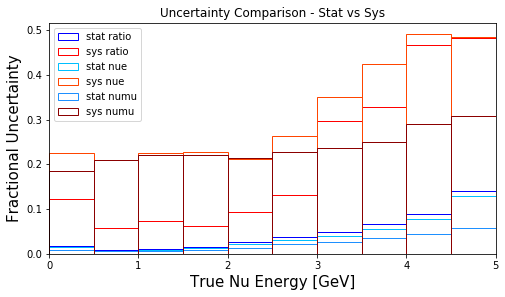

In [31]:
errors_r_fig = plt.figure(figsize=(8, 7))
errors_r_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_r_ax1 = plt.subplot(ratio_gs[0])


bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]


nue_stat_weights = np.sqrt(np.diag(nue_cov_mc_stat))/nue_wanted_list
nue_sys_weights = np.sqrt(np.diag(nue_cov))/nue_wanted_list
numu_stat_weights = np.sqrt(np.diag(numu_cov_mc_stat))/numu_wanted_list
numu_sys_weights = np.sqrt(np.diag(numu_cov))/numu_wanted_list
ratio_stat_weights = np.sqrt(np.diag(ratio_cov_mc_stat))/rbin_ratios
ratio_sys_weights = np.sqrt(np.diag(ratio_cov))/rbin_ratios


sel_stat = errors_r_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=ratio_stat_weights, label='stat ratio')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_sys_weights, label='sys ratio')
sel_stat = errors_r_ax1.hist(count, bins, edgecolor='deepskyblue', facecolor='None', weights=nue_stat_weights, label='stat nue')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='orangered', facecolor='None', weights=nue_sys_weights, label='sys nue')
sel_stat = errors_r_ax1.hist(count, bins, edgecolor='dodgerblue', facecolor='None', weights=numu_stat_weights, label='stat numu')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='darkred', facecolor='None', weights=numu_sys_weights, label='sys numu')
errors_r_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_r_ax1.set_xlabel('True Nu Energy [GeV]', fontsize=15)
errors_r_ax1.set_title("Uncertainty Comparison - Stat vs Sys")
errors_r_ax1.set_xlim([0, 5])
#errors_r_ax1.set_ylim([0, 100])
leg = errors_r_ax1.legend()
#errors_r_ax1.set_yscale('log')

In [36]:
errors_r_fig.savefig("batch_stat_vs_sys_errors_fig_full_500_catsel_ratio_nopions_trueE_fraclog_consistent.pdf")

In [32]:
ratio_bins = np.arange(0, 5.5, 0.5)
ratio_bincenters = np.arange(0.25, 5.25, 0.5)
ratio_bin_edges = np.arange(0, 5.5, 0.5)
ratio_bin_size = [(ratio_bin_edges[i + 1] - ratio_bin_edges[i]) / 2
            for i in range(len(ratio_bin_edges) - 1)]
ratio_n_tot = rbin_ratios

print(ratio_n_tot)
print("")
print("error")
print(ratio_exp_err)
print("")
ratio_frac_err = ratio_exp_err / ratio_n_tot
print(ratio_frac_err)

#nue_ax1.bar(nue_bincenters, nue_exp_err*2,width=[n*2 for n in nue_bin_size],facecolor='tab:blue',alpha=0.2,bottom=(nue_n_tot-nue_exp_err))
#numu_ax1.bar(numu_bincenters, numu_exp_err*2,width=[n*2 for n in numu_bin_size],facecolor='tab:blue',alpha=0.2,bottom=(numu_n_tot-numu_exp_err))
ratio_ax1.bar(ratio_bincenters, ratio_exp_err*2,width=[n*2 for n in ratio_bin_size],facecolor='tab:green',alpha=0.2,bottom=(ratio_n_tot-ratio_exp_err))
#ratio_ax1.set_ylim([0, 2.1])
ratio_ax1.set_xlim([0, 5])

[0.029169066795481143, 0.07103473783200236, 0.06443917441740074, 0.039121772595598805, 0.03594700893941636, 0.04366708445725528, 0.04229136256631084, 0.03702085708838665, 0.031166152958826444, 0.020656109680580185]

error
[0.00361191 0.0042203  0.00477579 0.00248379 0.003513   0.00601902
 0.01269825 0.01241977 0.01479583 0.01036661]

[0.12382675 0.05941179 0.07411308 0.06348863 0.09772714 0.13783878
 0.30025628 0.33548037 0.47474031 0.50186634]


(0, 5)

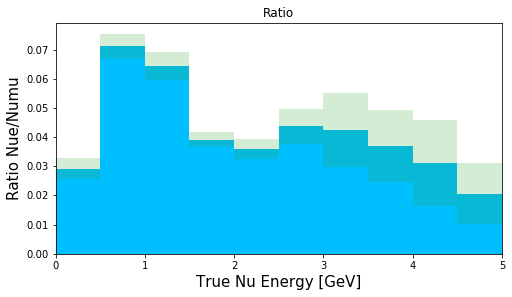

In [33]:
ratio_fig


In [53]:
ratio_fig.savefig("batch_ratio_fig_full_500_catsel_nopions_trueE.pdf")

In [34]:
nue_bin_edges = np.arange(0, 5.5, 0.5)
nue_bincenters = 0.5 * (nue_bin_edges[1:] + nue_bin_edges[:-1])
nue_bin_size = [(nue_bin_edges[i + 1] - nue_bin_edges[i]) / 2
            for i in range(len(nue_bin_edges) - 1)]

nue_frac_err = nue_exp_err / n_nue_tot
print(nue_frac_err)

nue_ax1.bar(nue_bincenters, nue_exp_err*2,width=[n*2 for n in nue_bin_size],facecolor='tab:green',alpha=0.2,bottom=(n_nue_tot-nue_exp_err))

[0.22536871 0.21016034 0.2254958  0.22882942 0.21355233 0.2661606
 0.35331334 0.42712555 0.49736717 0.50271309]


<BarContainer object of 10 artists>

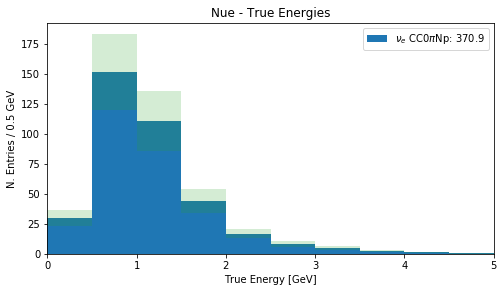

In [35]:
nue_fig

In [56]:
nue_fig.savefig("batch_nue_fig_full_500_catsel_nopions_trueE.pdf")

In [36]:
numu_bin_edges = np.arange(0, 5.5, 0.5)
numu_bincenters = 0.5 * (numu_bin_edges[1:] + numu_bin_edges[:-1])
numu_bin_size = [(numu_bin_edges[i + 1] - numu_bin_edges[i]) / 2
            for i in range(len(numu_bin_edges) - 1)]

numu_frac_err = numu_exp_err / n_numu_tot
print(numu_frac_err)

numu_ax1.bar(numu_bincenters, numu_exp_err*2,width=[n*2 for n in numu_bin_size],facecolor='tab:green',alpha=0.2,bottom=(n_numu_tot-numu_exp_err))

[0.18442561 0.20957586 0.22111862 0.22223192 0.21501773 0.22932799
 0.238865   0.25204774 0.29444894 0.31266171]


<BarContainer object of 10 artists>

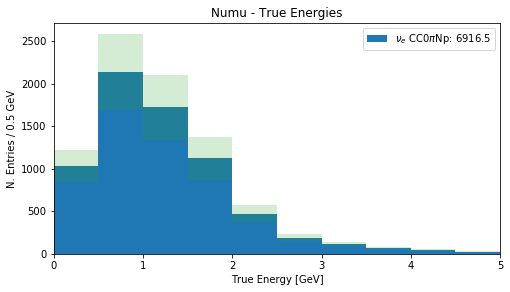

In [37]:
numu_fig

In [38]:
numu_fig.savefig("batch_numu_fig_full_500_catsel_nopions_trueE.pdf")

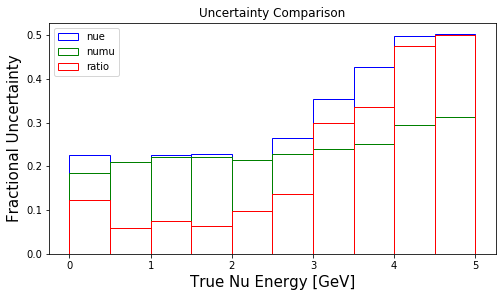

In [63]:
errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(ratio_gs[0])


bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]



sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nue_frac_err, label='nue')
sel_numu = errors_ax1.hist(count, bins, edgecolor='green', facecolor='None', weights=numu_frac_err, label='numu')
sel_ratio = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_frac_err, label='ratio')
errors_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_ax1.set_xlabel('True Nu Energy [GeV]', fontsize=15)
errors_ax1.set_title("Uncertainty Comparison")
leg = errors_ax1.legend()
#errors_ax1.set_xlim([0, 5])
#errors_ax1.set_ylim([0, 1])

In [64]:
errors_fig.savefig("batch_errors_fig_full_500_catsel_nopions_trueE.pdf")

## For Blockwise Unfolding

In [16]:
print("n_nue_tot", n_nue_tot)

n_nue_tot [ 25.54917281 130.21068376  95.89263236  38.90477975  14.75874474
   7.29417811   4.35415659   2.19412388   1.04933144   0.39249798]


In [17]:
print("n_numu_tot", n_numu_tot)

n_numu_tot [1011.16888403 2086.34697773 1662.74372383 1079.4921212   449.42161264
  181.00842877  108.45917309   64.00839843   38.66954193   23.13261749]


In [41]:
nue_numu_tot = np.concatenate((n_nue_tot, n_numu_tot), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))

[2.55491728e+01 1.30210684e+02 9.58926324e+01 3.89047798e+01
 1.47587447e+01 7.29417811e+00 4.35415659e+00 2.19412388e+00
 1.04933144e+00 3.92497983e-01 1.01116888e+03 2.08634698e+03
 1.66274372e+03 1.07949212e+03 4.49421613e+02 1.81008429e+02
 1.08459173e+02 6.40083984e+01 3.86695419e+01 2.31326175e+01]
20


Text(0.5, 1.0, 'Nue, Numu, Prior True Values')

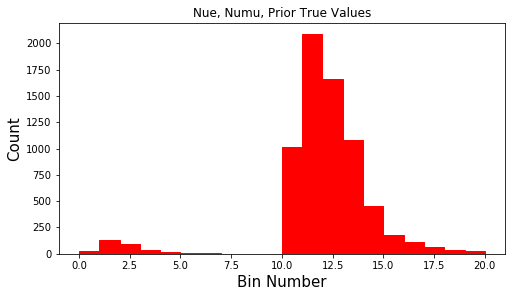

In [62]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


#bins = np.arange(0, 10.5, 0.5)
#count = np.linspace(0.1, 9.6, 20)
bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Prior True Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

In [63]:
np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_blockwise_recoCut_07Jul.csv", 
           nue_numu_tot,
           delimiter =", ", 
           fmt ='% s')